In [11]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import datetime

import matplotlib.pyplot as plt

## Apple Mobility Data
***

#### Functions:

In [172]:
def save_AMD_Italy():
    '''
    Generates the reduced CSV to speed up the loading time
    '''
    df = pd.read_csv("DATA/AMD/applemobilitytrends-2022-02-10.csv")
    df_out = applyfilter(df, {"country"  : ["Italy"], 
                              "geo_type" : ["sub-region"]})
    df_out.drop(["geo_type", "alternative_name", "sub-region", "country"], 1, inplace=True)
    #driving_norm, walking_norm = 0, 0
    # The following try except are implemented due to the fact that some regions lack the walking data
    #for region in region_name:
    #    
    #    try:
    #        walking_values += applyfilter(df_out, {"region" : [region], "transportation_type" : ["walking"]}).iloc[:,2:].values.flatten() * weight_dict[region]
    #    except Exception:
    #        pass
    #    else:
    #        walking_norm += weight_dict[region]
    #print(driving_norm,walking_norm)
    #df_tmp = pd.DataFrame([["Italy", "driving", *driving_values/driving_norm],
    #                       ["Italy", "walking", *walking_values/walking_norm]], columns=df_out.columns)
    #df_out = pd.concat([df_out, df_tmp], ignore_index=True)
    df_out.to_csv("DATA/AMD/applemobilitytrends_ITA-2022-02-10.csv", index=False)

def load_AMD_Italy():
    '''
    Load the AMD referred to Italy and return the dataframe and the dates, 
    and eventually saves the list of all possible cities/regions
    '''
    df = pd.read_csv("DATA/AMD/applemobilitytrends_ITA-2022-02-10.csv")
    dates_str  = df.columns[2:] # list of sting
    return df, dates_str

def applyfilter(df, dictionary):
    '''
    Filter the dataframe according to the dictionary: the values needs to be a list
    The order matter
    '''
    df_out = df.copy()
    for key in dictionary.keys():
        sub_df = [df_out.loc[df_out[key] == val] for val in dictionary[key]]
        df_out = pd.concat(sub_df, ignore_index=True)

    return df_out

def fill_missing(df):
    '''
    AMD driving are missing for the 2020-05-11, 2020-05-12 
    AMD are missing for the 2021-03-12
    '''
    df_driv = df.loc[df["transportation_type"] == "driving", ["2020-05-10","2020-05-13"]]
    values = (df_driv["2020-05-10"].values + df_driv["2020-05-13"].values)/2
    df.loc[df["transportation_type"] == "driving", "2020-05-11"] = values
    df.loc[df["transportation_type"] == "driving", "2020-05-12"] = values
    df["2021-03-12"] = (df["2021-03-11"] + df["2021-03-13"])/2

def transform_week_RAVG(dataframe, cols, window=7):
    '''
    Substitute the mobility data with it's rolling average
    '''
    values = dataframe[cols].values
    RAVG = np.array([values[:,ii-window:ii].sum(axis=1)/window for ii in np.arange(window,len(cols)+1)]).T
    dataframe[cols[:window-1]] = np.NaN
    dataframe[cols[window-1:]] = RAVG
    
def from_to(date_list, start, end):
    '''
    Return the indexes of a date list corresponding to the period between start and end
    '''
    a = list(date_list).index(start)
    b = list(date_list).index(end)
    return slice(a,b+1), np.arange(a,b+1)   # we need np because integer operation are not allowed on range object

#### Examples:

In [174]:
# Obviously needs to be run just the first time to generate the CVS
#save_AMD_Italy()
df_amd, dates_str_amd = load_AMD_Italy()
fill_missing(df_amd)
#transform_week_RAVG(df_amd, dates_str_amd)
region_list_amd = np.unique(df_amd["region"].values)
dates_datetime_amd = [datetime.datetime.strptime(date, "%Y-%m-%d").date() for date in dates_str_amd]
df_amd.head()

,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10
0,Abruzzo Region,driving,100.0,96.57,97.50,101.50,108.85,120.68,118.97,99.80,...,117.75,115.08,120.70,132.99,159.08,172.91,119.98,119.73,124.95,124.57
1,Abruzzo Region,walking,100.0,107.12,109.09,114.80,106.35,143.33,101.84,110.42,...,143.77,152.73,145.81,173.70,210.10,179.35,141.17,150.64,155.34,163.47
2,Apulia Region,driving,100.0,99.47,99.48,104.29,108.92,123.83,109.36,101.73,...,123.97,125.27,128.88,134.41,146.63,137.30,128.85,130.94,134.03,144.05
3,Apulia Region,walking,100.0,103.22,112.25,104.82,114.89,141.84,96.79,100.81,...,133.66,150.06,147.09,157.99,207.93,146.23,143.84,145.42,158.85,167.64
4,Autonomous Region Aosta Valley,driving,100.0,95.40,99.38,101.84,141.93,207.83,221.44,101.81,...,118.41,109.50,136.11,194.18,257.81,310.88,135.48,130.68,118.12,139.33


In [175]:
print(region_list_amd)

['Abruzzo Region' 'Apulia Region' 'Autonomous Region Aosta Valley'
 'Autonomous Region Friuli-Venezia Giulia' 'Autonomous Region Sardinia'
 'Autonomous Region Trentino-Alto Adige/Südtirol' 'Basilicata Region'
 'Calabria Region' 'Campania Region' 'Emilia-Romagna Region'
 'Lazio Region' 'Liguria Region' 'Lombardy Region' 'Marche Region'
 'Molise Region' 'Piedmont Region' 'Sicily Region' 'Tuscany Region'
 'Umbria Region' 'Veneto Region']


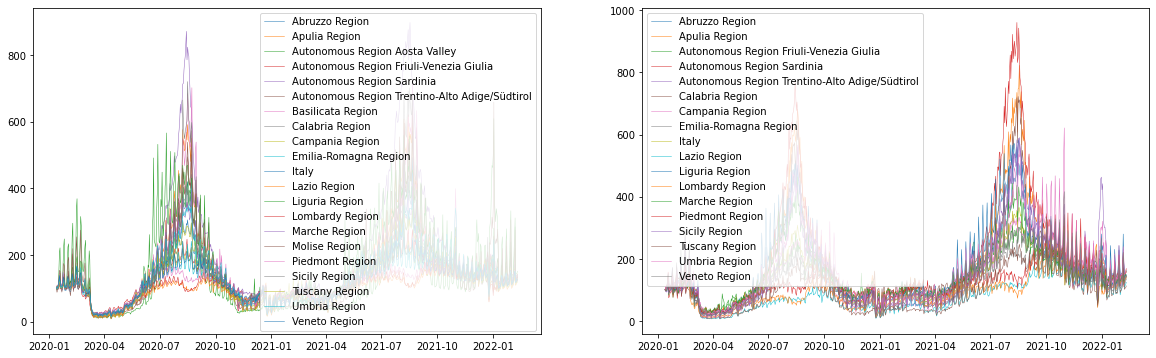

In [94]:
fig, ax = plt.subplots(1,2, figsize=[20,6])
for region in region_list_amd:
    try:
        ax[0].plot(dates_datetime_amd, applyfilter(df_amd, {"region" : [region]}).iloc[0,2:], label=region, linewidth=0.5)
    except Exception:
        pass
    
    try:
        ax[1].plot(dates_datetime_amd, applyfilter(df_amd, {"region" : [region]}).iloc[1,2:], label=region, linewidth=0.5)
    except Exception:
        pass
ax[0].legend()
ax[1].legend()
plt.show()

In [74]:
# To get the indexes of a given windows of time
#window_slice, window_mask = from_to(dates_list,"2020-03-21","2020-05-03")  # to a list we can just apply a slice

#fig, ax = plt.subplots(1,2, figsize=[20,6])

#ax[0].plot(dates_datetime[window_slice], applyfilter(df_ita, {"region" : ["Italy"]}).iloc[0,window_mask+2], linewidth=0.5)

#ax[1].plot(dates_datetime, applyfilter(df_ita, {"region" : ["Italy"]}).iloc[1,2:], linewidth=0.5)

#ax[0].legend()
#ax[1].legend()
#plt.show()

## Protezione civile
***

#### Functions:

In [162]:
def save_prot_civ():
    df = pd.read_csv("DATA/prot_civ/itaregioni.csv")
    df = df[['data', 'denominazione_regione', 'nuovi_positivi', 'totale_casi']]
    df_trentino = df[(df['denominazione_regione'] == 'P.A. Bolzano') | (df['denominazione_regione'] == 'P.A. Trento')].groupby('data', as_index = False).sum()
    df_trentino['denominazione_regione'] = 'Trentino alto adige' 
    df_prot_civ = pd.concat([df, df_trentino], ignore_index=True)
    df_prot_civ = df_prot_civ[(df_prot_civ['denominazione_regione'] != 'P.A. Bolzano') & (df_prot_civ['denominazione_regione'] != 'P.A. Trento')]
    df_prot_civ['data'] = [date.split('T')[0] for date in df_prot_civ['data']]
    df_prot_civ.to_csv("DATA/prot_civ/itaregioni_final.csv", index=False)

def load_prot_civ():
    '''
    '''
    df = pd.read_csv("DATA/prot_civ/itaregioni_final.csv")
    dates_str = np.unique(df["data"])
    return df, dates_str

#### Examples:

In [164]:
# To run just the first time
#save_prot_civ()
df_pc, dates_str_pc = load_prot_civ()
region_list_pc = np.unique(df_pc["denominazione_regione"].values)
dates_datetime_pc = [datetime.datetime.strptime(date, "%Y-%m-%d").date() for date in dates_str_pc]
df_pc.head()
#dates_datetime_pc

,data,denominazione_regione,nuovi_positivi,totale_casi
0,2020-02-24,Abruzzo,0,0
1,2020-02-24,Basilicata,0,0
2,2020-02-24,Calabria,0,0
3,2020-02-24,Campania,0,0
4,2020-02-24,Emilia-Romagna,18,18


# LAG-time Analysis
***

## Correlation test
***

#### Functions

In [183]:
region_sorted_pc = ["Abruzzo", "Puglia", "Valle d'Aosta", "Friuli Venezia Giulia",
                    "Sardegna", "Trentino alto adige", "Basilicata", "Calabria", 
                    "Campania", "Emilia-Romagna", "Lazio", "Liguria", "Lombardia", 
                    "Marche", "Molise", "Piemonte", "Sicilia", "Toscana", "Umbria", "Veneto"]

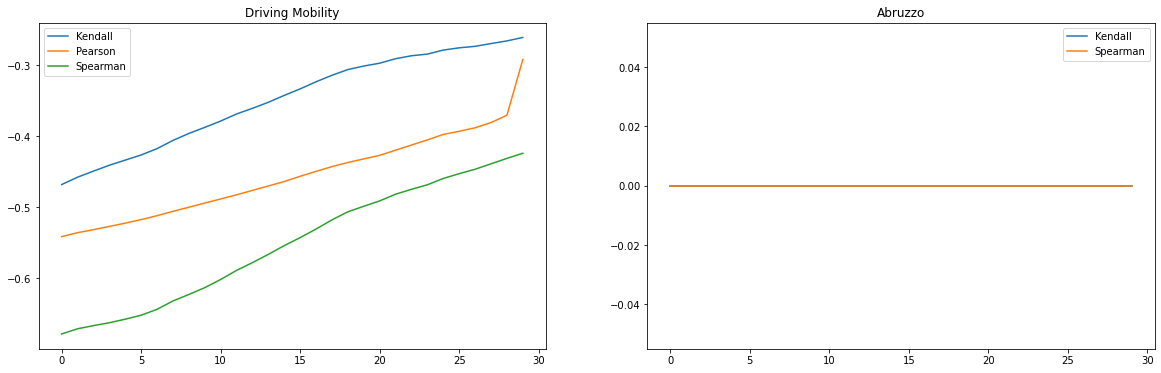

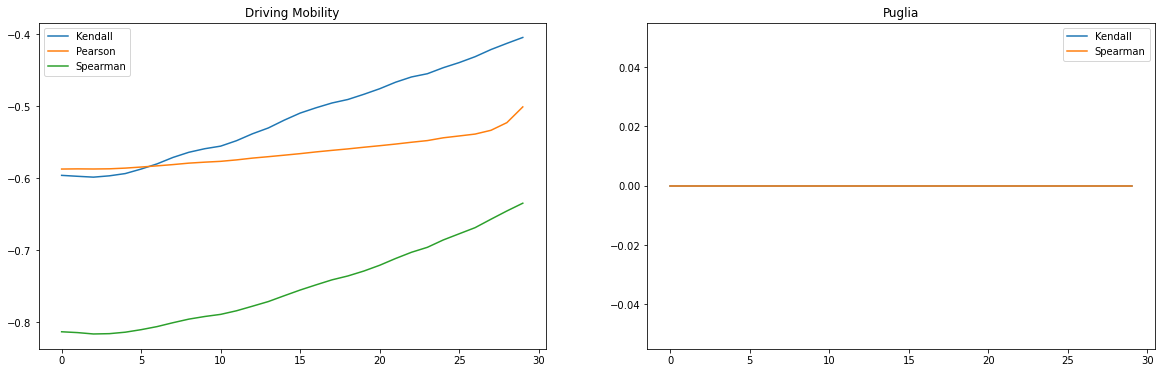

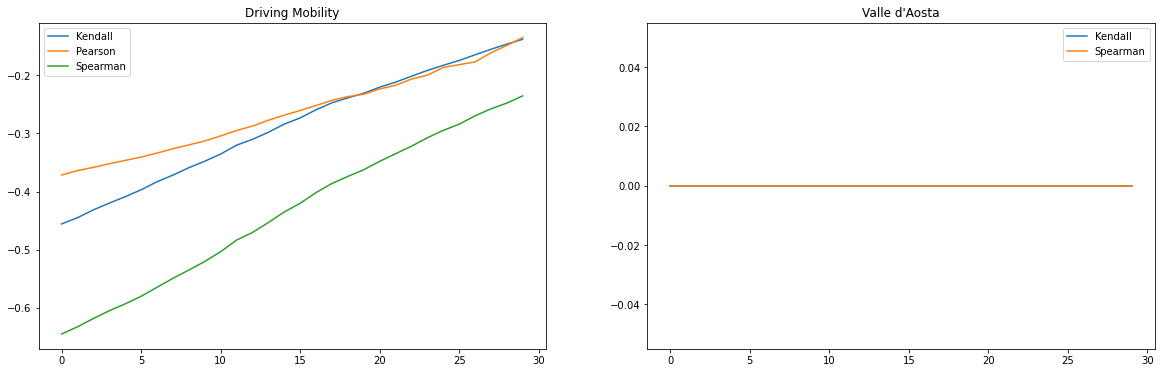

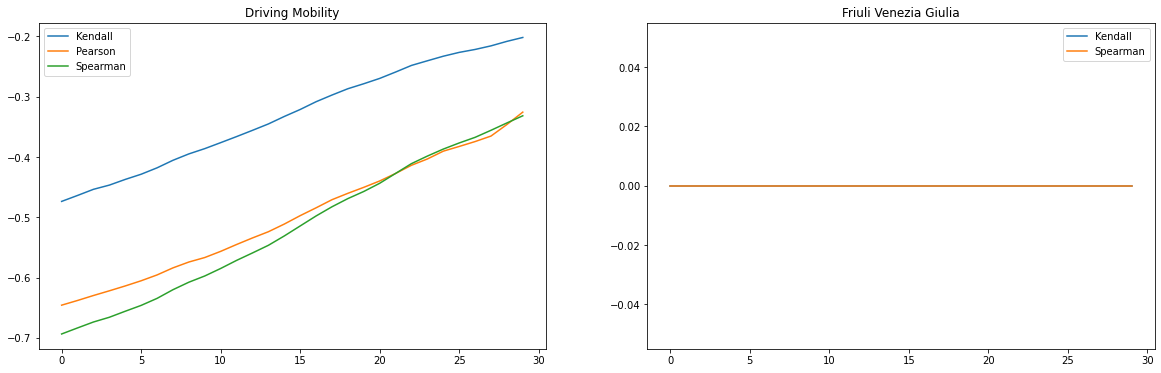

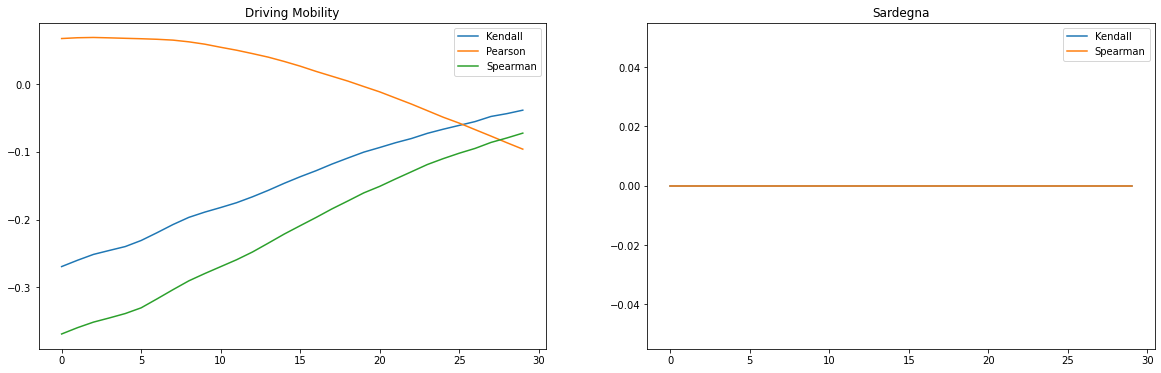

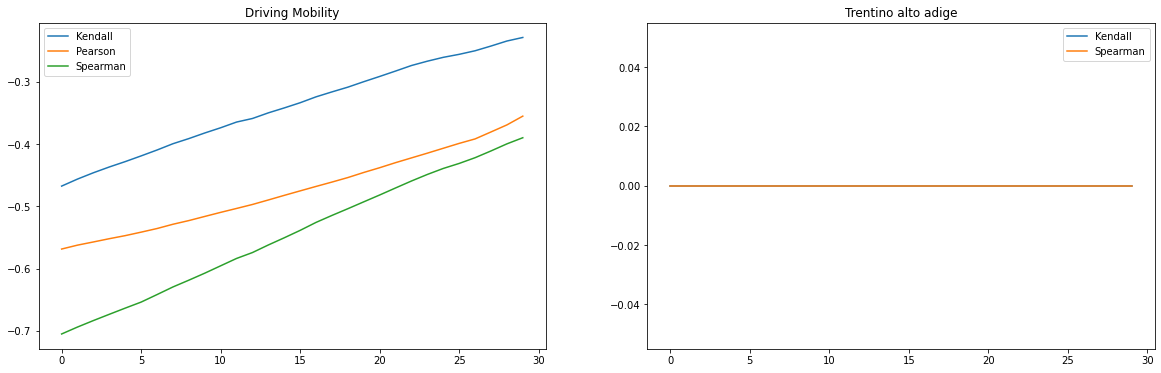

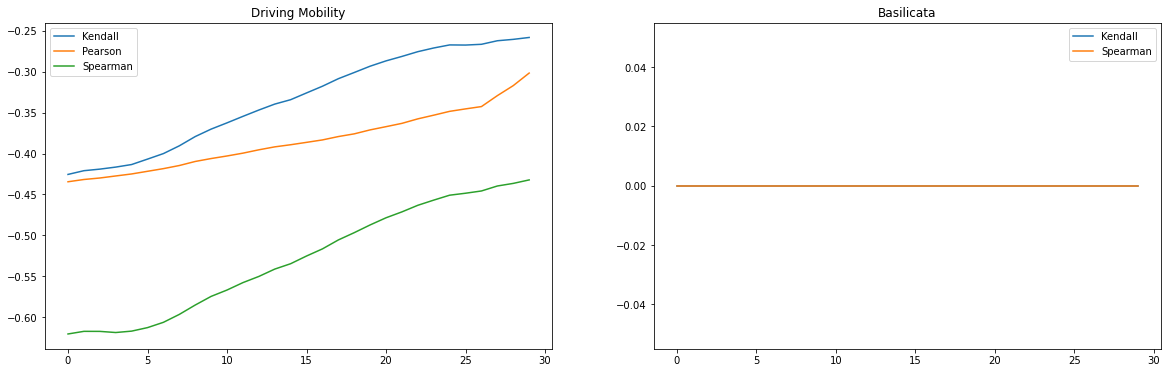

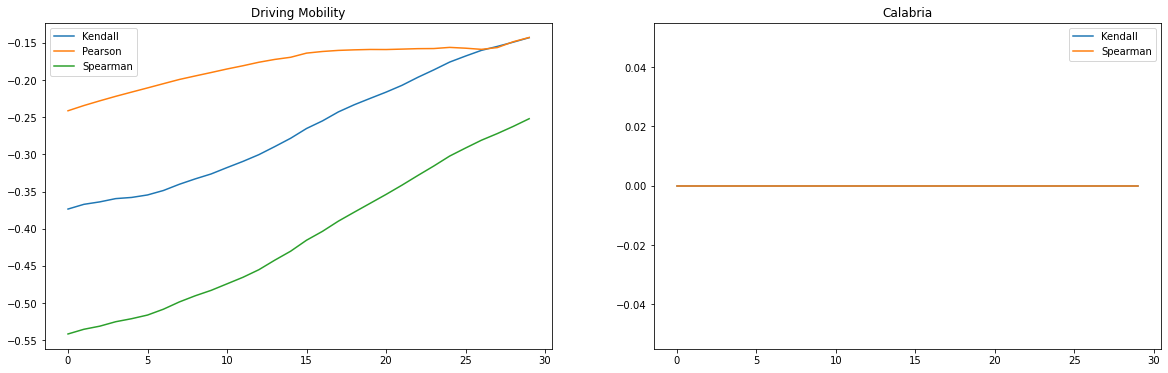

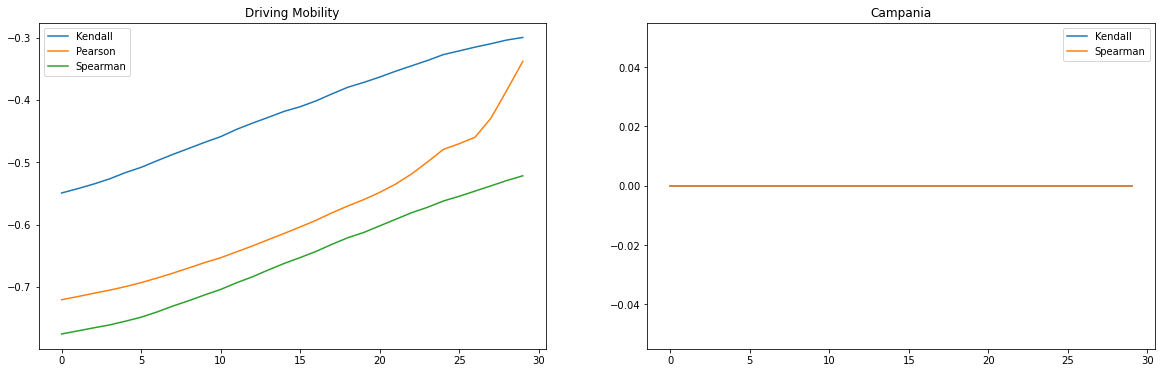

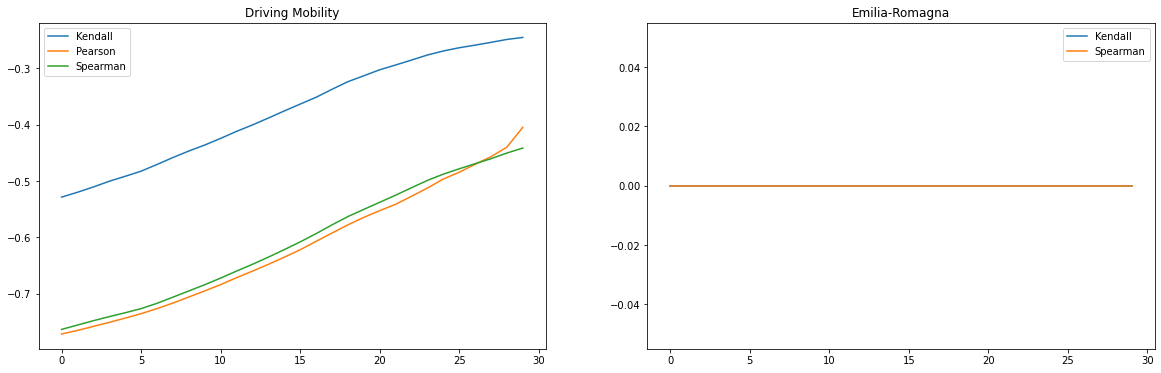

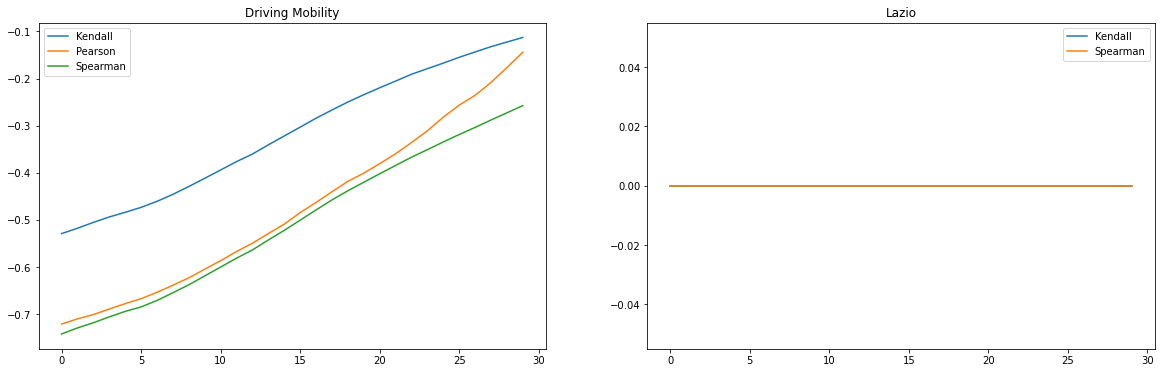

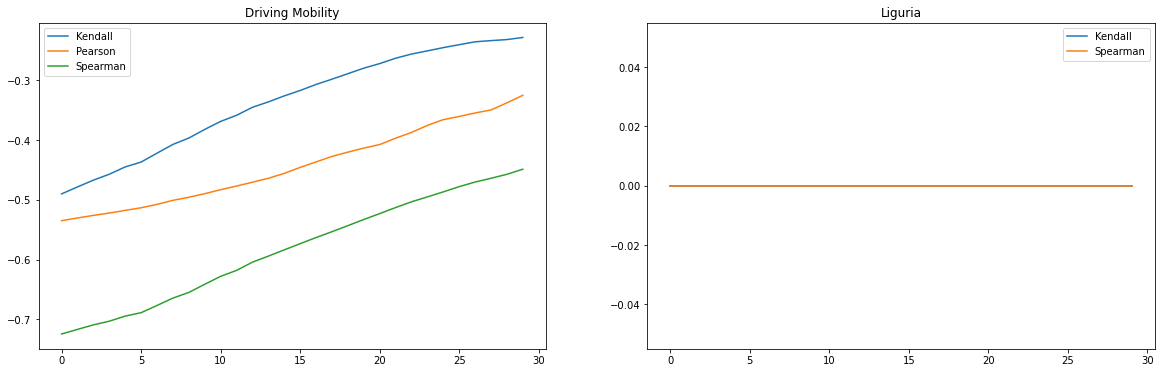

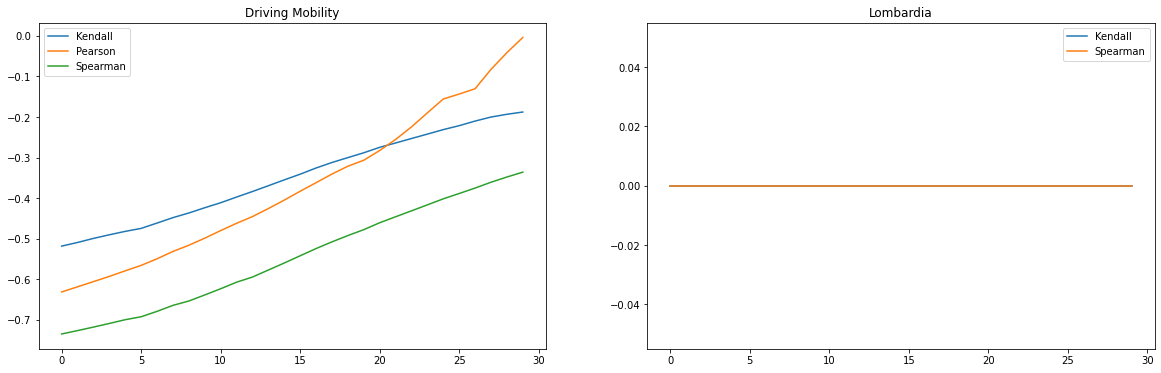

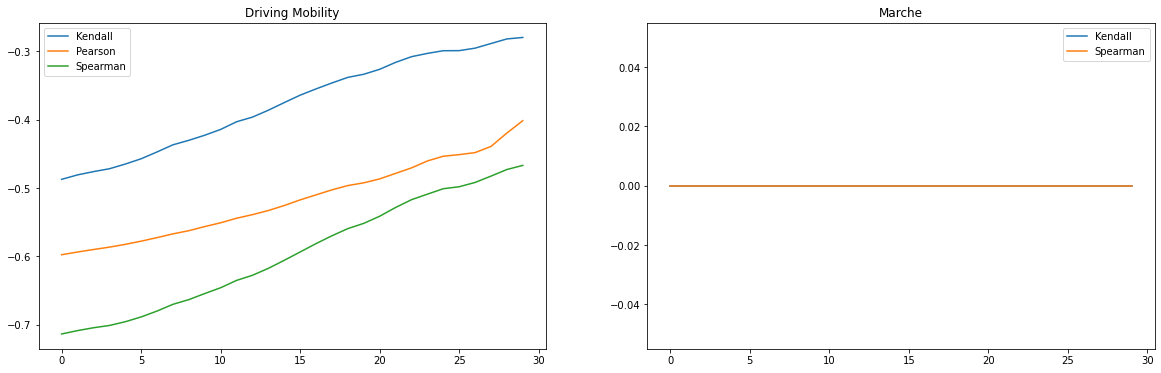

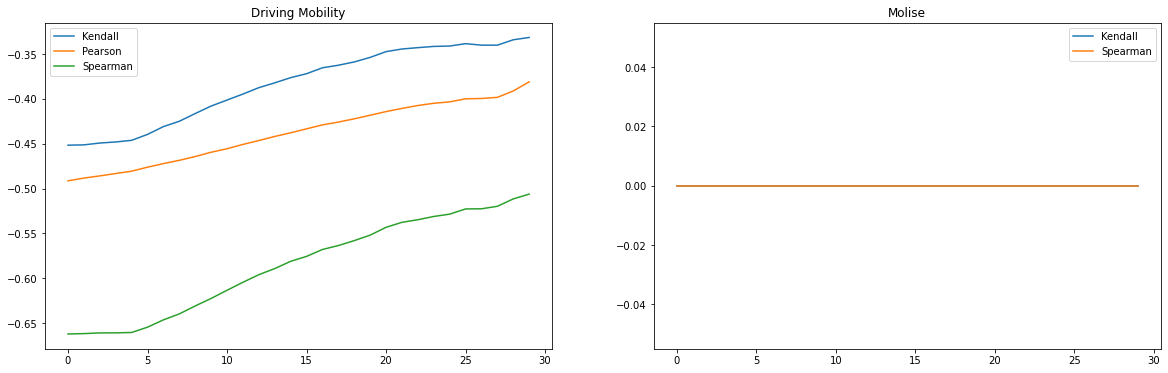

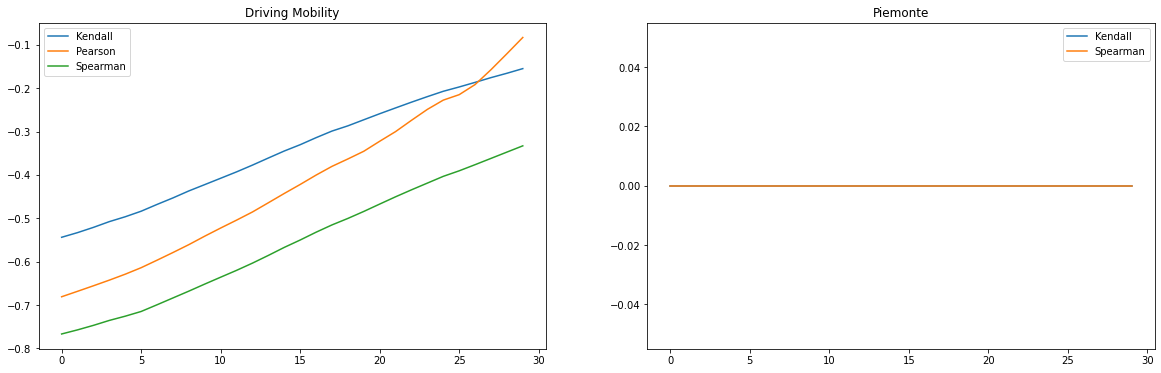

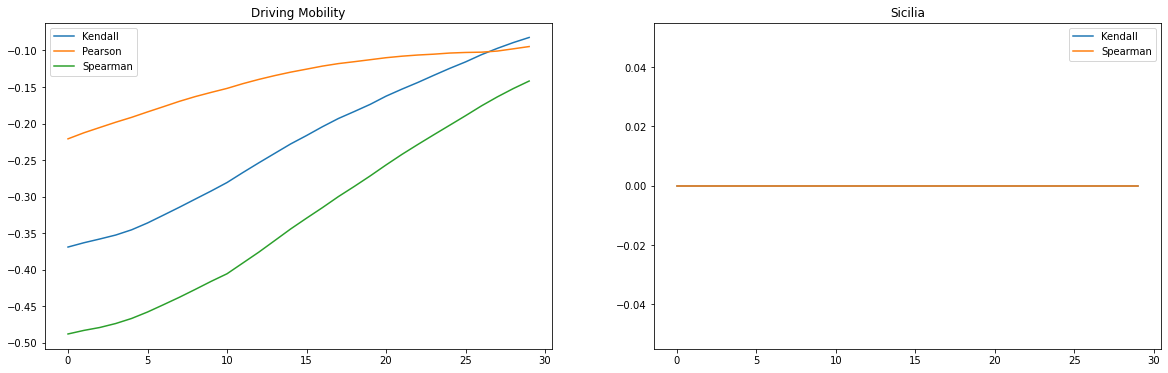

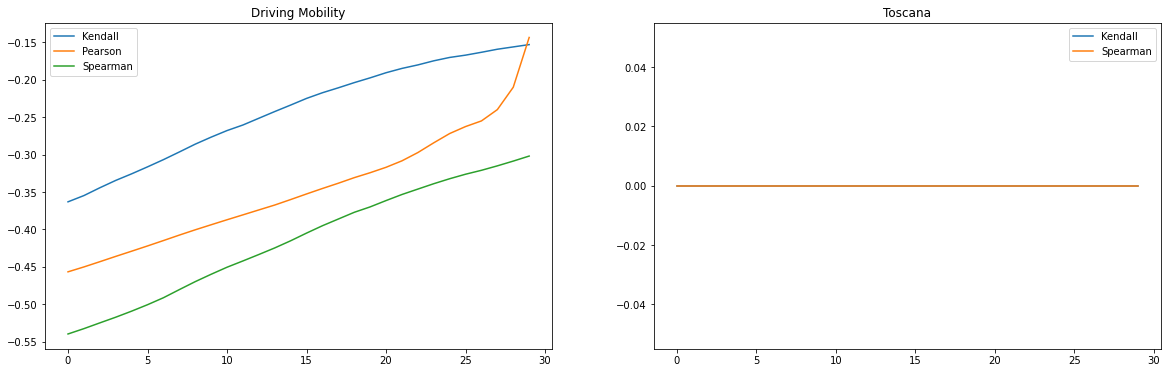

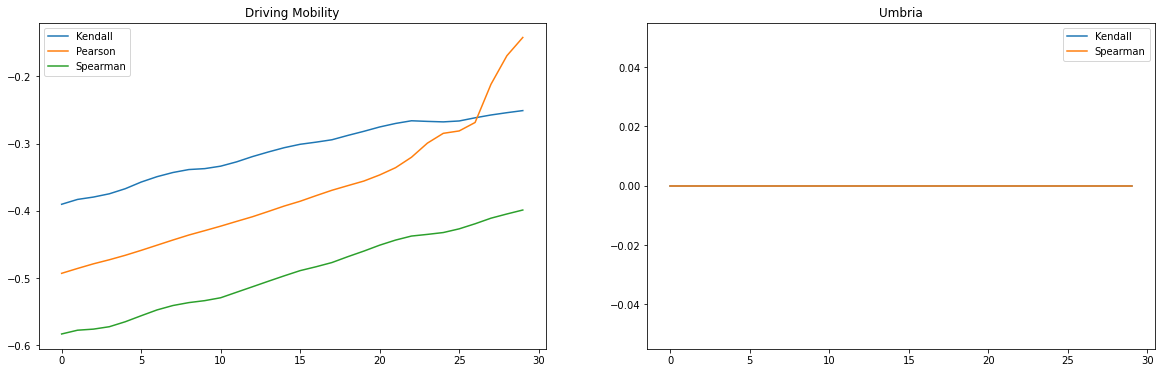

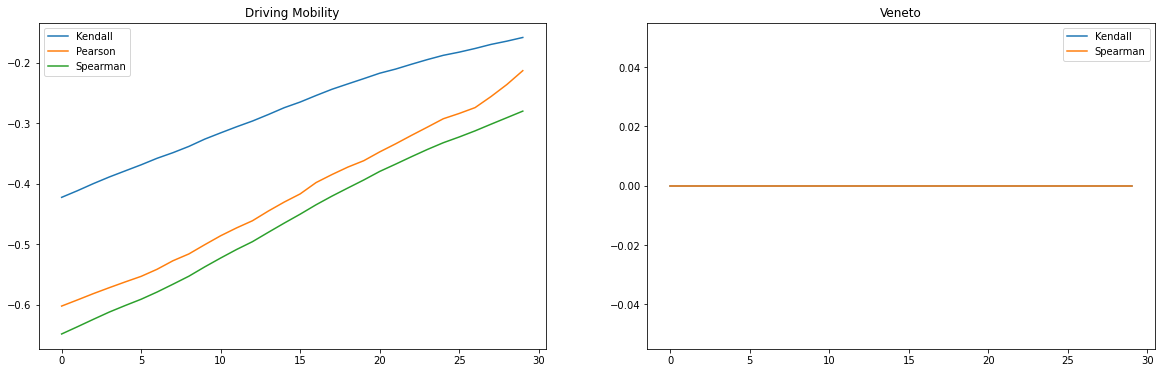

In [184]:
t_start = "2020-10-01"
t_final = "2021-12-01"
lags = np.arange(30)
x_window_slice, x_window_mask = from_to(dates_str_amd, t_start, t_final)
y_window_slice, y_window_mask = from_to(dates_str_pc,  t_start, t_final)
driving_spearman = np.zeros((len(lags)))
driving_pearson = np.zeros((len(lags)))
walking_spearman = np.zeros((len(lags)))
driving_kendall  = np.zeros((len(lags)))
walking_kendall  = np.zeros((len(lags)))

for kk, region_amd in enumerate(region_list_amd):
    
    x = applyfilter(df_ita, {"region" : [region_amd]}).iloc[:, x_window_mask+2].values
    for ii,lag in enumerate(lags):    
        y = applyfilter(df_pc, {"denominazione_regione" : [region_sorted_pc[kk]]}).iloc[lag+y_window_mask,2].values

        driving_spearman[ii] = ss.spearmanr(x[0], y)[0]
        driving_pearson[ii] = ss.pearsonr(x[0], y)[0]
        #walking_spearman[ii] = ss.spearmanr(x[1], y)[0]
        driving_kendall[ii]  = ss.kendalltau(x[0], y)[0]
        #walking_kendall[ii]  = ss.kendalltau(x[1], y)[0]

    # Printing
    fig, ax = plt.subplots(1,2, figsize=[20,6])

    ax[0].plot(lags, driving_kendall,  label="Kendall")
    ax[0].plot(lags, driving_pearson,  label="Pearson")
    ax[1].plot(lags, walking_kendall,  label="Kendall")
    ax[0].plot(lags, driving_spearman, label="Spearman")
    ax[1].plot(lags, walking_spearman, label="Spearman")

    ax[0].title.set_text("Driving Mobility")
    ax[1].title.set_text("Walking Mobility")
    ax[0].legend()
    ax[1].legend()
    plt.title(region_sorted_pc[kk])
    plt.show()

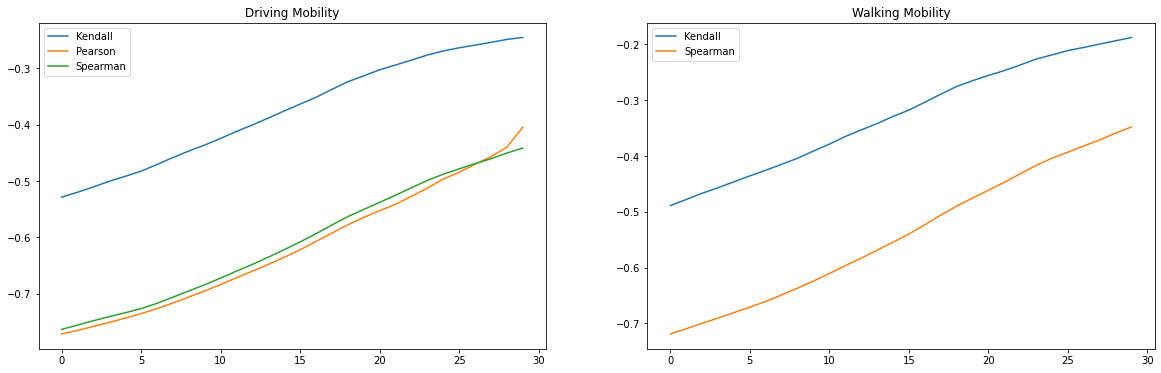

In [147]:
fig, ax = plt.subplots(1,2, figsize=[20,6])

ax[0].plot(lags, driving_kendall,  label="Kendall")
ax[0].plot(lags, driving_pearson,  label="Pearson")
ax[1].plot(lags, walking_kendall,  label="Kendall")
ax[0].plot(lags, driving_spearman, label="Spearman")
ax[1].plot(lags, walking_spearman, label="Spearman")

ax[0].title.set_text("Driving Mobility")
ax[1].title.set_text("Walking Mobility")
ax[0].legend()
ax[1].legend()
plt.show()

In [107]:
ss.kendalltau(x[1], y)

KendalltauResult(correlation=-0.6719406384499448, pvalue=5.765235346318117e-16)

In [157]:
np.unique(df_pc["denominazione_regione"].values)

AttributeError: 'Series' object has no attribute 'dropNaN'

In [166]:
region_sorted_pc = ["Abruzzo", "Puglia", "Valle d'Aosta", "Friuli Venezia Giulia",
                    "Sardegna", "Trentino alto adige", "Basilicata", "Calabria", 
                    "Campania", "Emilia-Romagna", "Lazio", "Liguria", "Lombardia", 
                    "Marche", "Molise", "Piemonte", "Sicilia", "Toscana", "Umbria", "V"]

array(['Abruzzo Region', 'Apulia Region',
       'Autonomous Region Aosta Valley',
       'Autonomous Region Friuli-Venezia Giulia',
       'Autonomous Region Sardinia',
       'Autonomous Region Trentino-Alto Adige/Südtirol',
       'Basilicata Region', 'Calabria Region', 'Campania Region',
       'Emilia-Romagna Region', 'Italy', 'Lazio Region', 'Liguria Region',
       'Lombardy Region', 'Marche Region', 'Molise Region',
       'Piedmont Region', 'Sicily Region', 'Tuscany Region',
       'Umbria Region', 'Veneto Region'], dtype=object)

In [182]:
len(region_sorted_pc)

19